import modules

In [20]:
import rasterio
import numpy as np
from rasterio.windows import Window
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random
import matplotlib.colors as mc
import cmocean


open 60m band files and read files 


In [2]:
band1_60 = rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R60m/T31UET_20200530T105031_B01_60m.jp2').read().astype('float32')
band2_60 = rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R60m/T31UET_20200530T105031_B02_60m.jp2').read().astype('float32')
band3_60 = rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R60m/T31UET_20200530T105031_B03_60m.jp2').read().astype('float32')
band4_60 = rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R60m/T31UET_20200530T105031_B04_60m.jp2').read().astype('float32')
band8_60 = rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R60m/T31UET_20200530T105031_B8A_60m.jp2').read().astype('float32')
band11_60 = rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R60m/T31UET_20200530T105031_B11_60m.jp2').read().astype('float32')
band12_60 = rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R60m/T31UET_20200530T105031_B12_60m.jp2').read().astype('float32')

flatten files 

In [3]:
blue_flat = band2_60.flatten()
green_flat = band3_60.flatten()
red_flat = band4_60.flatten()
NIR = band8_60.flatten()
coastal_flat = band1_60.flatten()
swir1_flat = band11_60.flatten()
swir2_flat = band12_60.flatten()

stack files for visualisation

In [4]:
stacked2 = np.vstack((blue_flat, green_flat)).T
stacked3 = np.vstack((red_flat, green_flat, blue_flat)).T
stacked_vegetation = np.vstack((NIR, red_flat, green_flat)).T
stacked_bathymetric = np.vstack((red_flat, green_flat, coastal_flat)).T
stacked_agriculture = np.vstack((swir1_flat, NIR, blue_flat)).T

In [5]:
ndvi = (NIR-red_flat)/(NIR+red_flat)
ndvi = ndvi.reshape(-1,1)
moisture = (NIR-swir1_flat)/(NIR+swir1_flat)
moisture = moisture.reshape(-1,1)

create random state for clustering

In [65]:
random = random.randint(1,3000000)

KMeans clustering 

In [7]:
clustering = KMeans(n_clusters=4, random_state=random)
cluster2 = clustering.fit_predict(stacked3)
cluster3 = clustering.fit_predict(stacked_vegetation)


In [8]:
clustering2 = KMeans(n_clusters=8, random_state = random)
cluster4 = clustering2.fit_predict(stacked_bathymetric)
cluster5 = clustering2.fit_predict(stacked_agriculture)

In [66]:
clustering3 = KMeans(n_clusters=5, random_state = random)
cluster6 = clustering3.fit_predict(ndvi)
cluster7 = clustering3.fit_predict(moisture)

check shape of clusters 

In [11]:
print('shape cluster 2', cluster2.shape)
print('shape cluster 3', cluster3.shape)
print('shape cluster 4', cluster4.shape)
print('shape cluster 5', cluster5.shape)
print('shape cluster 6', cluster5.shape)
print('shape cluster 7', cluster5.shape)

shape cluster 2 (3348900,)
shape cluster 3 (3348900,)
shape cluster 4 (3348900,)
shape cluster 5 (3348900,)
shape cluster 6 (3348900,)
shape cluster 7 (3348900,)


In [67]:
plot_array_3 = np.reshape(cluster2, (len(band2_60[0]), len(band2_60[0])))
plot_array_4 = np.reshape(cluster3, (len(band2_60[0]), len(band2_60[0])))

plot_array_5 = np.reshape(cluster4, (len(band2_60[0]), len(band2_60[0])))
plot_array_6 = np.reshape(cluster5, (len(band2_60[0]), len(band2_60[0])))

plot_array_7 = np.reshape(cluster6, (len(band2_60[0]), len(band2_60[0])))
plot_array_8 = np.reshape(cluster7, (len(band2_60[0]), len(band2_60[0])))


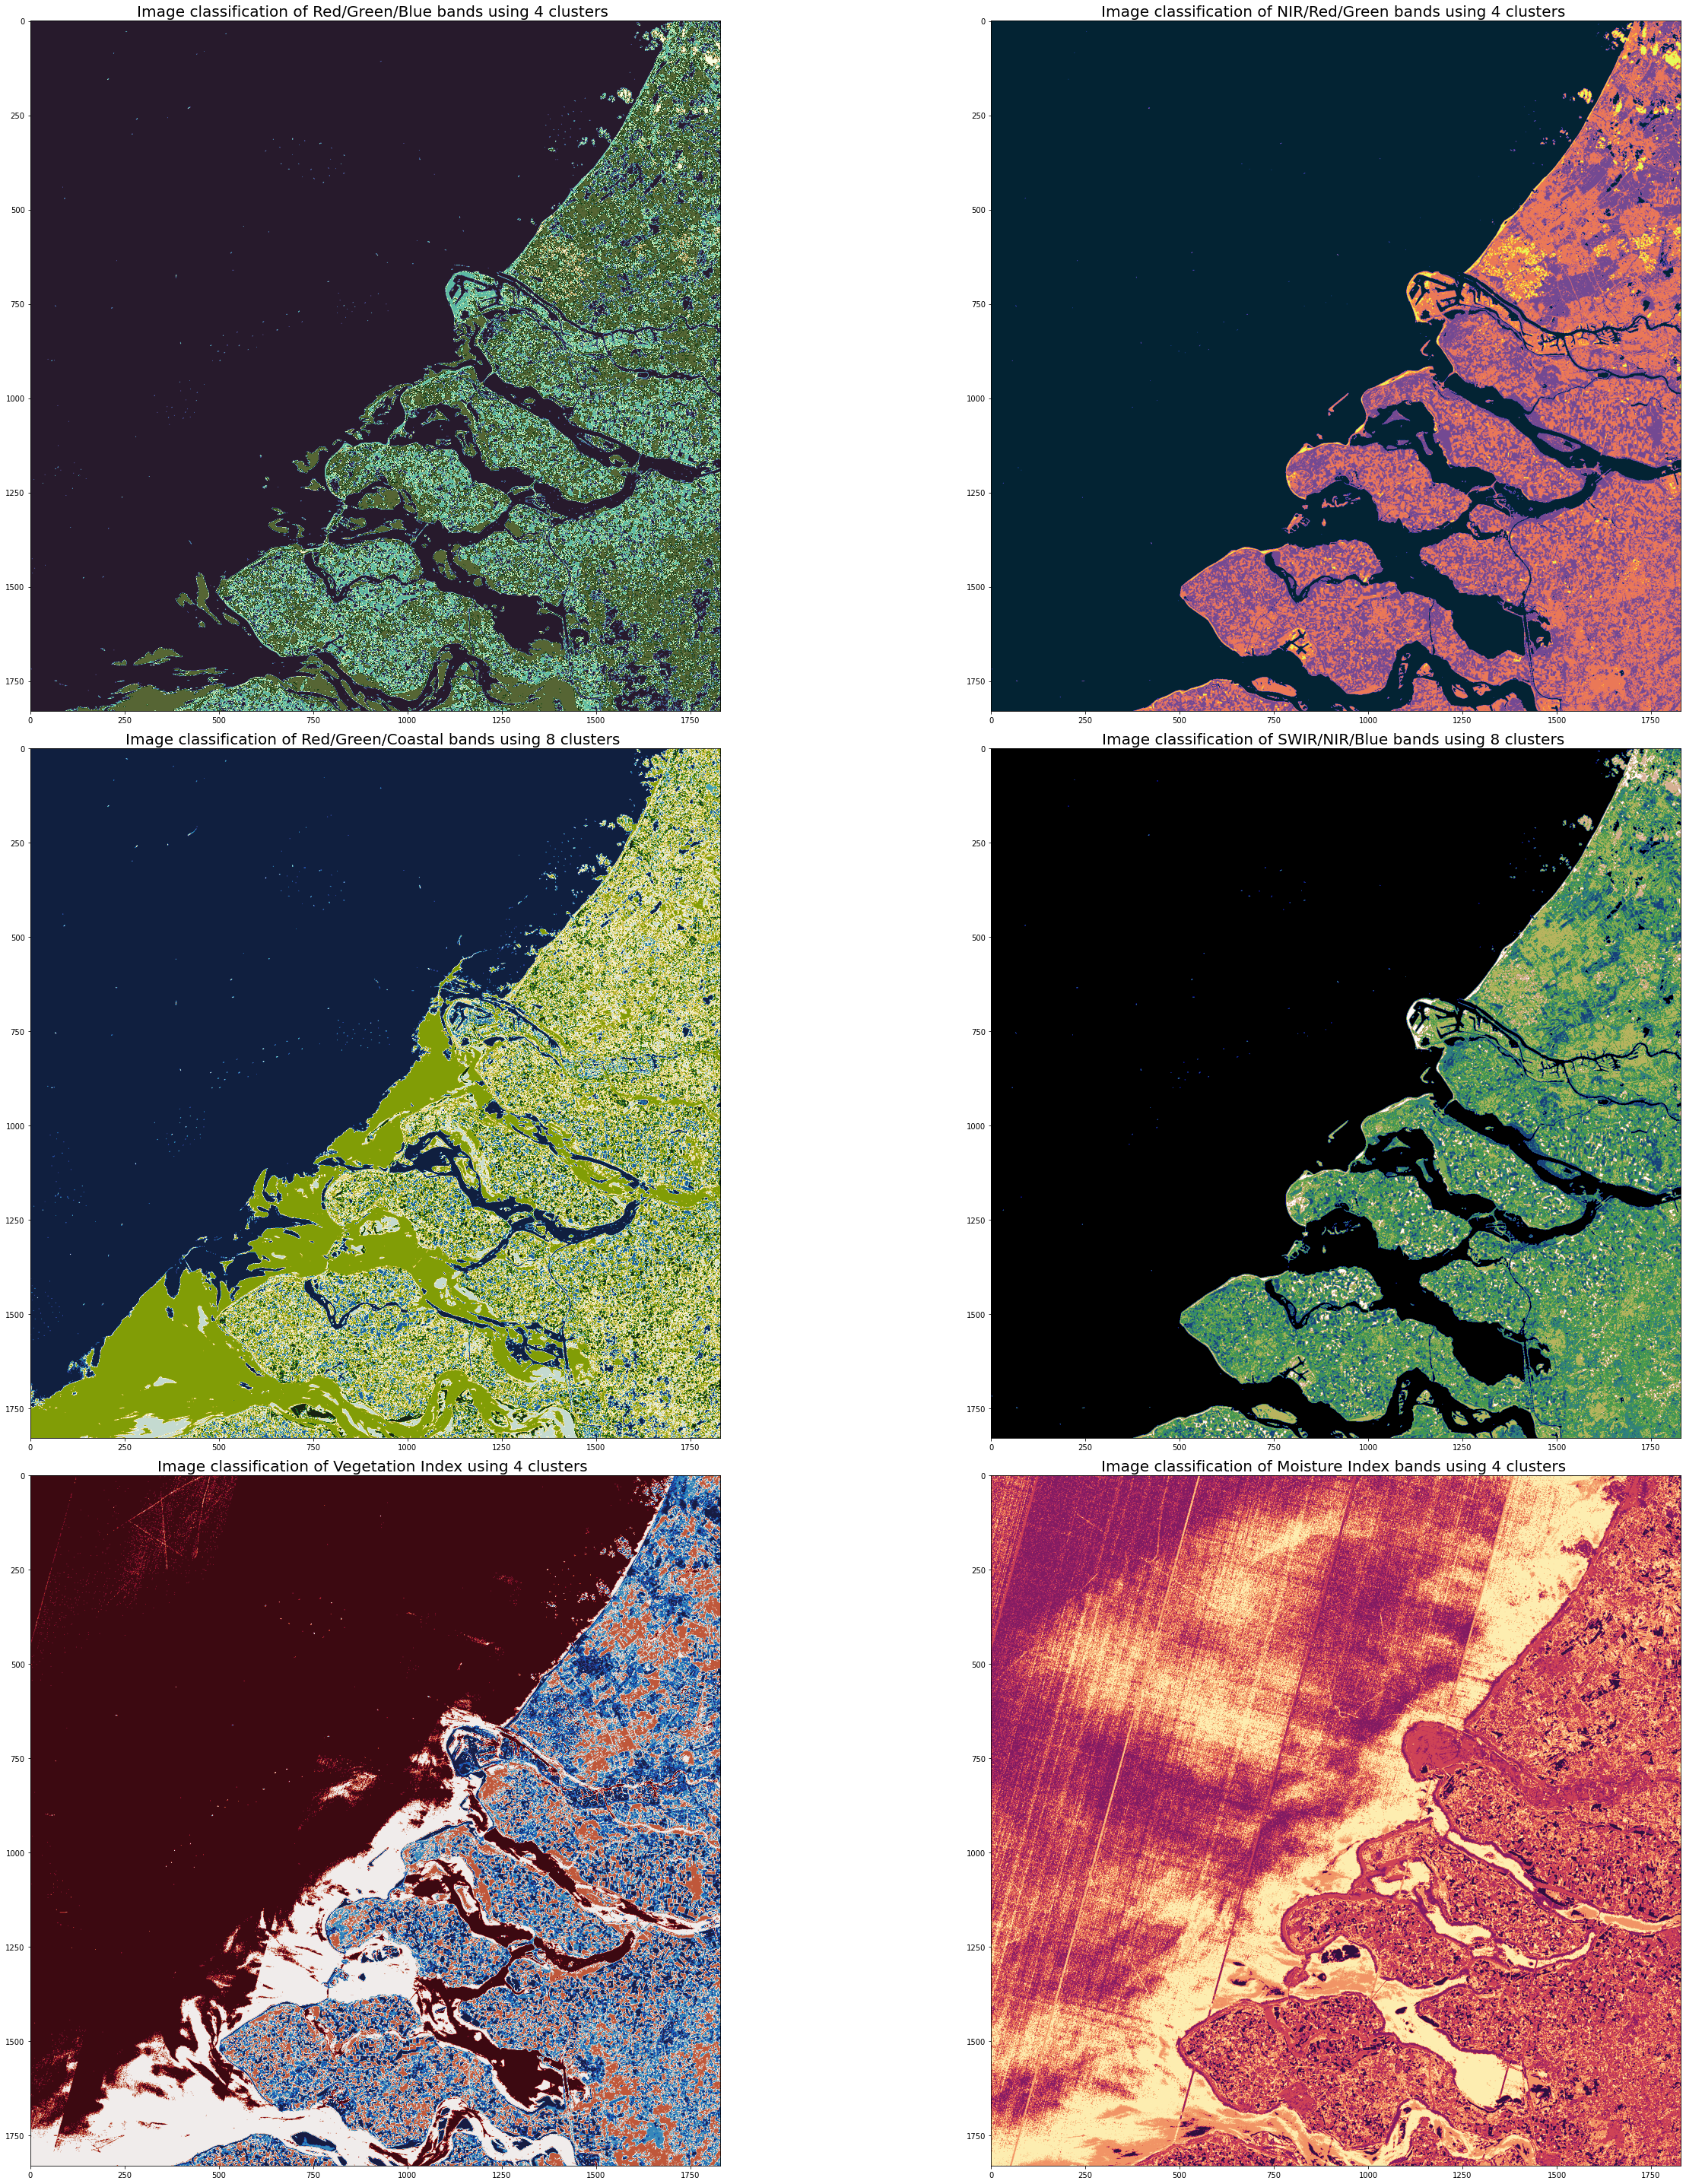

In [68]:
fig = plt.figure(figsize =(40,40))

ax1 = fig.add_subplot(321)
ax1.imshow(plot_array_3, cmap='cmo.topo')
ax1.set_title("Image classification of Red/Green/Blue bands using 4 clusters ",fontsize=20)

ax2 = fig.add_subplot(322)
ax2.imshow(plot_array_4, cmap='cmo.thermal')
ax2.set_title("Image classification of NIR/Red/Green bands using 4 clusters ",fontsize=20)

ax3 = fig.add_subplot(323)
ax3.imshow(plot_array_5, cmap='cmo.delta')
ax3.set_title("Image classification of Red/Green/Coastal bands using 8 clusters ",fontsize=20)

ax4 = fig.add_subplot(324)
ax4.imshow(plot_array_6, cmap='gist_earth')
ax4.set_title("Image classification of SWIR/NIR/Blue bands using 8 clusters ",fontsize=20)

ax5 = fig.add_subplot(325)
ax5.imshow(plot_array_7, cmap='cmo.balance')
ax5.set_title("Image classification of Vegetation Index using 4 clusters ",fontsize=20)

ax6 = fig.add_subplot(326)
ax6.imshow(plot_array_8, cmap='cmo.matter')
ax6.set_title("Image classification of Moisture Index bands using 4 clusters ",fontsize=20)

plt.tight_layout()

In [ ]:
# figuur makes no sense

#fig = plt.figure()
#ax = fig.add_subplot(111)
#ax.scatter(reshaped_60m[0], reshaped_60m[1])
#plt.show()

plot clusters in 3D 

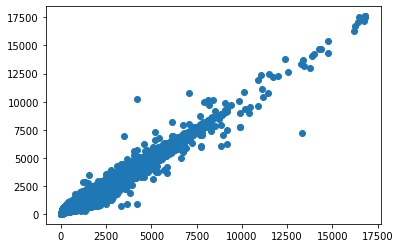

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(stacked3[:,0], stacked3[:,1])
plt.show()

open 10m band files

In [ ]:
with rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R10m/T31UET_20200530T105031_B02_10m.jp2') as src:
    row, col = src.index(601200, 5773695)
    band2_10 = src.read(1, window=Window(row_off = row, col_off=col, height=500, width=700))

with rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R10m/T31UET_20200530T105031_B03_10m.jp2') as src:
    row, col = src.index(601200, 5773695)
    band3_10 = src.read(1, window=Window(row_off = row, col_off=col, height=500, width=700))

with rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R10m/T31UET_20200530T105031_B04_10m.jp2') as src:
    row, col = src.index(601200, 5773695)
    band4_10 = src.read(1, window=Window(row_off = row, col_off=col, height=500, width=700))

with rasterio.open('./GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R10m/T31UET_20200530T105031_B08_10m.jp2') as src:
    row, col = src.index(601200, 5773695)
    band8_10 = src.read(1, window=Window(row_off = row, col_off=col, height=500, width=700))

In [ ]:
plt.imshow(band8_10, cmap = 'pink')
plt.imshow(band2_10, cmap = 'pink')
plt.imshow(band3_10, cmap = 'pink')
plt.imshow(band4_10, cmap = 'pink')
plt.show()